# Plott der Parteien
- Alles anhand der Parteien sortieren
- Danach alle Mehrfachnennungen rausschmeissen
- Danach anschauen und anhand der Daten plotten.

In [1]:
%matplotlib inline
import numpy as np
import requests
import pandas as pd
from bs4 import BeautifulSoup
from datetime import datetime

import requests, zipfile, io #zum abspeichern von PDFs
from tqdm import tqdm # Anzeigen des aktuellen Ladestandes
import PyPDF2
import re
from os import listdir
from os.path import isfile, join
import locale
import matplotlib.pyplot as plt

In [2]:
df_tuti=pd.read_csv("KRFrames/df_tuti_Ganzes_Frame")

In [3]:
df_tuti

,Unnamed: 0,VorlageNR,Geschäft,Namenganz,P,Einreichedatum,Stand,Link Vorstoss-PDF,Zuständigkeit,Art des Geschäfts,url
0,0,3031,Interpellation der SVP-Fraktion betreffend Sic...,SVP-Fraktion SVP,SVP,2019-11-26,Einreichung,3031-1-16191_Neutralitaet_Schulen.pdf,Direktion für Bildung und Kultur,Interpellation,/gast/geschaefte/2018
1,1,3030,Motion der SVP-Fraktion betreffend Stärkung de...,SVP-Fraktion SVP,SVP,2019-11-26,Einreichung,3030-1-16190_Gewaltentrennung.pdf,NaN,Motion,/gast/geschaefte/2017
2,2,3029,Interpellation der Fraktion Alternative - die ...,Alternative ALG,ALG,2019-11-24,Einreichung,3029-1-16189_Glencore.pdf,Volkswirtschaftsdirektion,Interpellation,/gast/geschaefte/2016
3,3,3026,Interpellation von Markus Spörri und Thomas Ga...,Thomas Gander FDP,FDP,2019-11-15,Einreichung,3026-1-16186_Airbnb.pdf,Baudirektion,Interpellation,/gast/geschaefte/2013
4,4,3026,Interpellation von Markus Spörri und Thomas Ga...,Markus Spörri FDP,FDP,2019-11-15,Einreichung,3026-1-16186_Airbnb.pdf,Baudirektion,Interpellation,/gast/geschaefte/2013
...,...,...,...,...,...,...,...,...,...,...,...
1798,1798,857,"Motion von Heinz Tännler, Karl Betschart und H...",Karl Betschart SVP,SVP,2005-04-26,Datenmigration,pdoc_880_1.pdf,NaN,Motion,/gast/geschaefte/1340
1799,1799,836,Interpellation von Käty Hofer Buser betreffend...,Käty Hofer Buser SP,SP,2002-12-03,Datenmigration,pdoc_212_1.pdf,NaN,Interpellation,/gast/geschaefte/1339
1800,1800,810,Motion von Marcel Meyer betreffend Vergabe von...,Marcel Meyer CVP,CVP,2002-08-13,Datenmigration,pdoc_62_1.pdf,NaN,Motion,/gast/geschaefte/1335
1801,1801,801,Motion von Hans Abicht betreffend Raumkonzept ...,Hans Abicht FDP,FDP,2006-08-22,Datenmigration,pdoc_1440_1.pdf,NaN,Motion,/gast/geschaefte/1333


In [4]:
df_tuti[df_tuti["Geschäft"].str.contains("FDP")].shape

(44, 11)

In [5]:
df_tuti

,Unnamed: 0,VorlageNR,Geschäft,Namenganz,P,Einreichedatum,Stand,Link Vorstoss-PDF,Zuständigkeit,Art des Geschäfts,url
0,0,3031,Interpellation der SVP-Fraktion betreffend Sic...,SVP-Fraktion SVP,SVP,2019-11-26,Einreichung,3031-1-16191_Neutralitaet_Schulen.pdf,Direktion für Bildung und Kultur,Interpellation,/gast/geschaefte/2018
1,1,3030,Motion der SVP-Fraktion betreffend Stärkung de...,SVP-Fraktion SVP,SVP,2019-11-26,Einreichung,3030-1-16190_Gewaltentrennung.pdf,NaN,Motion,/gast/geschaefte/2017
2,2,3029,Interpellation der Fraktion Alternative - die ...,Alternative ALG,ALG,2019-11-24,Einreichung,3029-1-16189_Glencore.pdf,Volkswirtschaftsdirektion,Interpellation,/gast/geschaefte/2016
3,3,3026,Interpellation von Markus Spörri und Thomas Ga...,Thomas Gander FDP,FDP,2019-11-15,Einreichung,3026-1-16186_Airbnb.pdf,Baudirektion,Interpellation,/gast/geschaefte/2013
4,4,3026,Interpellation von Markus Spörri und Thomas Ga...,Markus Spörri FDP,FDP,2019-11-15,Einreichung,3026-1-16186_Airbnb.pdf,Baudirektion,Interpellation,/gast/geschaefte/2013
...,...,...,...,...,...,...,...,...,...,...,...
1798,1798,857,"Motion von Heinz Tännler, Karl Betschart und H...",Karl Betschart SVP,SVP,2005-04-26,Datenmigration,pdoc_880_1.pdf,NaN,Motion,/gast/geschaefte/1340
1799,1799,836,Interpellation von Käty Hofer Buser betreffend...,Käty Hofer Buser SP,SP,2002-12-03,Datenmigration,pdoc_212_1.pdf,NaN,Interpellation,/gast/geschaefte/1339
1800,1800,810,Motion von Marcel Meyer betreffend Vergabe von...,Marcel Meyer CVP,CVP,2002-08-13,Datenmigration,pdoc_62_1.pdf,NaN,Motion,/gast/geschaefte/1335
1801,1801,801,Motion von Hans Abicht betreffend Raumkonzept ...,Hans Abicht FDP,FDP,2006-08-22,Datenmigration,pdoc_1440_1.pdf,NaN,Motion,/gast/geschaefte/1333


In [6]:
# Nun sortieren nach Parteien
df1=df_tuti.sort_values("P")
df1

,Unnamed: 0,VorlageNR,Geschäft,Namenganz,P,Einreichedatum,Stand,Link Vorstoss-PDF,Zuständigkeit,Art des Geschäfts,url
1802,1802,304,Motion von Manuela Weichelt betreffend HIV-Prä...,Manuela Weichelt ALG,ALG,2003-05-27,Datenmigration,pdoc_50_1.pdf,NaN,Motion,/gast/geschaefte/1309
1114,1114,1865,Postulat der Alternativen Grünen Fraktion und ...,Alternative ALG,ALG,2009-10-13,Datenmigration,13223_1865_1_Haushaltger%C3%A4te.pdf,NaN,Postulat,/gast/geschaefte/129
295,295,2797,Interpellation der Fraktion Alternative - die ...,Alternative ALG,ALG,2017-11-01,Kenntnisnahme,2797-1-15596_Theilerhaus.pdf,Baudirektion,Interpellation,/gast/geschaefte/1787
293,293,2800,Interpellation der Fraktion Alternative - die ...,Alternative ALG,ALG,2017-11-06,Kenntnisnahme,2800-1-15599_Paradise-Papers.pdf,Volkswirtschaftsdirektion,Interpellation,/gast/geschaefte/1790
688,688,2382,Interpellation der Alternativen Grünen Fraktio...,Alternative ALG,ALG,2014-04-14,Kenntnisnahme,14663_2382_1_Klimaschutz.pdf,Baudirektion,Interpellation,/gast/geschaefte/1370
...,...,...,...,...,...,...,...,...,...,...,...
247,247,2835,Interpellation von Willi Vollenweider betreffe...,Willi Vollenweider pl,pl,2018-02-14,Kenntnisnahme,2835-1-15687_Gueterbahnhof.pdf,Baudirektion,Interpellation,/gast/geschaefte/1825
219,219,2861,"Interpellation von Susanne Giger, Jürg Messmer...",Susanne Giger pl,pl,2018-04-16,Kenntnisnahme,2861-1-15762_Fertigstellung-FMS.pdf,Baudirektion,Interpellation,/gast/geschaefte/1851
218,218,2861,"Interpellation von Susanne Giger, Jürg Messmer...",Willi Vollenweider pl,pl,2018-04-16,Kenntnisnahme,2861-1-15762_Fertigstellung-FMS.pdf,Baudirektion,Interpellation,/gast/geschaefte/1851
166,166,2916,Postulat von Willi Vollenweider betreffend Prü...,Willi Vollenweider pl,pl,2018-11-25,Nicht-Erheblicherklärung,2916-1-15932_Home-Guard.pdf,Sicherheitsdirektion,Postulat,/gast/geschaefte/1904


In [7]:
#Voila, denke das stimmt - es sind rund 800 Vorlagen weniger. Also mehr als ein Drittel weniger.
df2=df1.drop_duplicates(subset=['VorlageNR', 'P'], keep=False)

In [8]:
df2.tail(50)

,Unnamed: 0,VorlageNR,Geschäft,Namenganz,P,Einreichedatum,Stand,Link Vorstoss-PDF,Zuständigkeit,Art des Geschäfts,url
307,307,2781,Motion von Thomas Werner betreffend Anpassung ...,Thomas Werner SVP,SVP,2017-09-11,Nicht-Erheblicherklärung,1771,Baudirektion,Motion,/gast/geschaefte/1771
1541,1541,1354,Postulat von Manuel Aeschbacher betreffend Pub...,Manuel Aeschbacher SVP,SVP,2005-06-15,Datenmigration,pdoc_944_1.pdf,NaN,Postulat,/gast/geschaefte/945
309,309,2777,"Postulat von Jean-Luc Mösch, Rainer Suter und ...",Rainer Suter SVP,SVP,2017-09-03,Erledigterklärung,2777-1-15555_Bahnanbindung-ZUGWEST.pdf,Volkswirtschaftsdirektion,Postulat,/gast/geschaefte/1767
1539,1539,1356,Motion der SVP-Fraktion betreffend Änderung de...,SVP-Fraktion SVP,SVP,2005-06-30,Datenmigration,pdoc_962_1.pdf,NaN,Motion,/gast/geschaefte/947
312,312,2774,Interpellation der SVP-Fraktion betreffend Ung...,SVP-Fraktion SVP,SVP,2017-08-15,Kenntnisnahme,1764,Sicherheitsdirektion,Interpellation,/gast/geschaefte/1764
313,313,2773,Kleine Anfrage der SVP-Fraktion betreffend Wer...,SVP-Fraktion SVP,SVP,2017-08-15,Antwort des Regierungsrats,1763,Sicherheitsdirektion,Kleine Anfrage,/gast/geschaefte/1763
1534,1534,1362,"Interpellation von Monika Barmet, Karl Künzle,...",Karl Nussbaumer SVP,SVP,2005-08-04,Datenmigration,pdoc_972_1.pdf,NaN,Interpellation,/gast/geschaefte/953
844,844,2162,Interpellation der SVP-Fraktion betreffend Kra...,SVP-Fraktion SVP,SVP,2012-06-15,Datenmigration,14107_2162_1_Sans-Papiers.pdf,NaN,Interpellation,/gast/geschaefte/414
979,979,2030,Interpellation von Thomas Aeschi betreffend Il...,Thomas Aeschi SVP,SVP,2011-03-21,Datenmigration,13714_2030_1_Illegale_neu.pdf,NaN,Interpellation,/gast/geschaefte/285
1527,1527,1365,Interpellation von Anton Stöckli betreffend Tr...,Anton Stöckli SVP,SVP,2005-08-26,Datenmigration,pdoc_984_1.pdf,NaN,Interpellation,/gast/geschaefte/956


In [9]:
df4=df2.set_index(pd.DatetimeIndex(df2["Einreichedatum"]))
                 


In [10]:
df5=df4.sort_index().head(1088)

In [12]:
df5

,Unnamed: 0,VorlageNR,Geschäft,Namenganz,P,Einreichedatum,Stand,Link Vorstoss-PDF,Zuständigkeit,Art des Geschäfts,url
Einreichedatum,,,,,,,,,,,
1982-12-16,1642,1223,"Motion von Karl Betschart, Andrea Hodel und Be...",Beat Villiger CVP,CVP,1982-12-16,Datenmigration,pdoc_656_1.pdf,NaN,Motion,/gast/geschaefte/823
1982-12-16,1644,1223,"Motion von Karl Betschart, Andrea Hodel und Be...",Karl Betschart SVP,SVP,1982-12-16,Datenmigration,pdoc_656_1.pdf,NaN,Motion,/gast/geschaefte/823
1982-12-16,1643,1223,"Motion von Karl Betschart, Andrea Hodel und Be...",Andrea Hodel FDP,FDP,1982-12-16,Datenmigration,pdoc_656_1.pdf,NaN,Motion,/gast/geschaefte/823
1998-01-29,1655,1201,Motion der FDP-Fraktion betreffend Einführungs...,FDP-Fraktion FDP,FDP,1998-01-29,Datenmigration,pdoc_620_1.pdf,NaN,Motion,/gast/geschaefte/802
1998-10-27,1772,1016,Postulat von René Bär betreffend Ungültigerklä...,René Bär SVP,SVP,1998-10-27,Datenmigration,pdoc_131_1.pdf,NaN,Postulat,/gast/geschaefte/636
...,...,...,...,...,...,...,...,...,...,...,...
2019-11-06,6,3024,Interpellation von Claus Soltermann und Heinz ...,Heinz Achermann CVP,CVP,2019-11-06,Überweisung an Regierungsrat,3024-1-16179_Stadtbahn.pdf,Baudirektion,Interpellation,/gast/geschaefte/2012
2019-11-06,5,3024,Interpellation von Claus Soltermann und Heinz ...,Claus Soltermann GLP,GLP,2019-11-06,Überweisung an Regierungsrat,3024-1-16179_Stadtbahn.pdf,Baudirektion,Interpellation,/gast/geschaefte/2012
2019-11-24,2,3029,Interpellation der Fraktion Alternative - die ...,Alternative ALG,ALG,2019-11-24,Einreichung,3029-1-16189_Glencore.pdf,Volkswirtschaftsdirektion,Interpellation,/gast/geschaefte/2016


# Ranking

## Die Parteien

In [12]:
#Anzahl Vorstösse der Parteien und ihren Mitgliedern. Seit 2005
df5["P"]["2005":].value_counts()

CVP        195
SVP        190
SP         176
ALG        167
FDP        125
GLP         42
Piraten     21
CSP         14
pl           8
Name: P, dtype: int64

In [13]:
df5["P"]["2005":][~df5["P"]["2005":].str.contains("GLP")& ~df5["P"]["2005":].str.contains("Piraten")&~df5["P"]["2005":].str.contains("CSP")&~df5["P"]["2005":].str.contains("pl")].value_counts()

CVP    195
SVP    190
SP     176
ALG    167
FDP    125
Name: P, dtype: int64

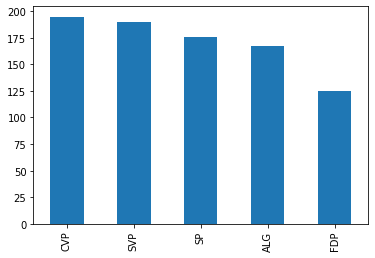

In [14]:
df5["P"]["2005":][~df5["P"]["2005":].str.contains("GLP")& ~df5["P"]["2005":].str.contains("Piraten")&~df5["P"]["2005":].str.contains("CSP")&~df5["P"]["2005":].str.contains("pl")].value_counts().plot(kind="bar")

In [15]:
# Ranking der letzten Legislatur pro Partei
df5["P"]["2015":"2018"].value_counts()

SVP        59
ALG        47
CVP        46
SP         41
FDP        30
Piraten    21
GLP        21
pl          7
CSP         2
Name: P, dtype: int64

In [16]:
df5["P"]["2015":"2018"][~df5["P"]["2015":"2018"].str.contains("GLP")& ~df5["P"]["2015":"2018"].str.contains("Piraten")&~df5["P"]["2015":"2018"].str.contains("CSP")&~df5["P"]["2015":"2018"].str.contains("pl")].value_counts()

SVP    59
ALG    47
CVP    46
SP     41
FDP    30
Name: P, dtype: int64

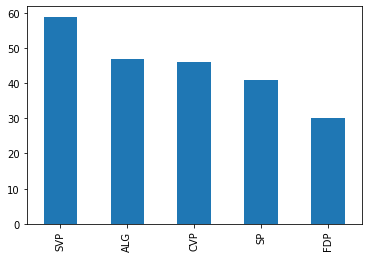

In [17]:
df5["P"]["2015":"2018"][~df5["P"]["2015":"2018"].str.contains("GLP")& ~df5["P"]["2015":"2018"].str.contains("Piraten")&~df5["P"]["2015":"2018"].str.contains("CSP")&~df5["P"]["2015":"2018"].str.contains("pl")].value_counts().plot(kind="bar")

In [18]:
df5["P"]["2019"].value_counts() #Aktuelle Legislatur, erstes Jahr

SP     14
SVP    13
ALG    10
CVP     9
FDP     6
GLP     5
CSP     3
Name: P, dtype: int64

In [19]:
df5["P"]["2019"][~df5["P"]["2019"].str.contains("GLP")& ~df5["P"]["2019"].str.contains("Piraten")&~df5["P"]["2019"].str.contains("CSP")&~df5["P"]["2019"].str.contains("pl")].value_counts()

SP     14
SVP    13
ALG    10
CVP     9
FDP     6
Name: P, dtype: int64

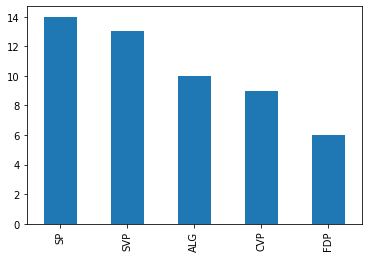

In [20]:
df5["P"]["2019"][~df5["P"]["2019"].str.contains("GLP")& ~df5["P"]["2019"].str.contains("Piraten")&~df5["P"]["2019"].str.contains("CSP")&~df5["P"]["2019"].str.contains("pl")].value_counts().plot(kind="bar")

In [21]:
df5["P"]["01-07-2009":"2010"].value_counts() #Wahlen 2010

CVP    29
SP     25
FDP    22
ALG    21
SVP    20
CSP     4
Name: P, dtype: int64

In [22]:
df5["P"]["01-7-2013":"2014"].value_counts() #Wahlen 14 (das letzte Halbjahr des Vorjahres und das Wahljahr)

CVP    33
SVP    30
SP     28
ALG    19
FDP    15
GLP     7
Name: P, dtype: int64

In [23]:
df5["P"]["01-7-2017":"2018"].value_counts() # Wahlen 18: (das letzte Halbjahr des Vorjahres und das Wahljahr)

SVP    35
ALG    28
CVP    25
SP     20
FDP    18
GLP     8
pl      5
CSP     2
Name: P, dtype: int64

## Kantonsräte und Fraktionen

In [43]:
df5["Namenganz"]["2005":"2019"].value_counts().head(50)

Alternative ALG                   88
SP-Fraktion SP                    88
SVP-Fraktion SVP                  66
CVP-Fraktion CVP                  60
FDP-Fraktion FDP                  31
Daniel Stadlin GLP                28
Philip C. Brunner SVP             23
Jolanda Spiess-Hegglin Piraten    21
Andreas Hausheer CVP              21
Thomas Lötscher FDP               16
Vroni Straub-Müller CSP           14
Moritz Schmid SVP                 14
Zari Dzaferi SP                   14
Kurt Balmer CVP                   13
Martin Stuber ALG                 13
Silvan Hotz CVP                   12
Andreas Lustenberger ALG          12
Martin B. Lehmann SP              12
Alois Gössi SP                    12
Rudolf Balsiger FDP               12
Manuel Brandenberg SVP            10
Anna Lustenberger-Seitz ALG       10
Eusebius Spescha SP                9
Andreas Hürlimann ALG              9
Beni Riedi SVP                     8
Willi Vollenweider pl              7
Hubert Schuler SP                  7
R

In [42]:
# Die Top Namen der letzten Legislatur
df5["Namenganz"]["2015":"2018"].value_counts()

(65,)

In [36]:
# Die Top-17 der einreichenden vor den letzten kantonalen Wahlen
df5["Namenganz"]["2017":"2018"].value_counts().head(25)


Alternative ALG             15
SP-Fraktion SP              13
SVP-Fraktion SVP            12
Philip C. Brunner SVP        9
CVP-Fraktion CVP             7
FDP-Fraktion FDP             5
Willi Vollenweider pl        5
Karen Umbach FDP             4
Andreas Lustenberger ALG     4
Zari Dzaferi SP              4
Daniel Stadlin GLP           4
Pirmin Andermatt CVP         3
Rita Hofer ALG               3
Thomas Werner SVP            3
Laura Dittli CVP             3
Esther Haas ALG              3
Manuel Brandenberg SVP       2
Claus Soltermann GLP         2
Florian Weber FDP            2
Hans Baumgartner CVP         2
Moritz Schmid SVP            2
Andreas Hürlimann ALG        2
Andreas Hausheer CVP         2
Rainer Suter SVP             2
Beni Riedi SVP               2
Name: Namenganz, dtype: int64

In [80]:
# Die Top 25 der ersten Jahres der ersten Legislatur - neue raussuchen.
df5["Namenganz"]["2019"].value_counts().head(25)

SP-Fraktion SP              8
SVP-Fraktion SVP            7
CVP-Fraktion CVP            5
Vroni Straub-Müller CSP     3
Philip C. Brunner SVP       3
Claus Soltermann GLP        3
Andreas Lustenberger ALG    2
Rainer Suter SVP            2
FDP-Fraktion FDP            2
Zari Dzaferi SP             2
Drin Alaj SP                2
Daniel Stadlin GLP          2
Alternative ALG             2
Ivo Egger ALG               1
Manuela Leemann CVP         1
Heinz Achermann CVP         1
Stéphanie Vuichard ALG      1
Michael Arnold FDP          1
Alois Gössi SP              1
Laura Dittli CVP            1
Anastas Odermatt ALG        1
Rita Hofer ALG              1
Pirmin Andermatt CVP        1
Thomas Gander FDP           1
Helene Zimmermann FDP       1
Name: Namenganz, dtype: int64

# Die Ergebnisse der einzelnen Parteien
Jedoch noch einzeln

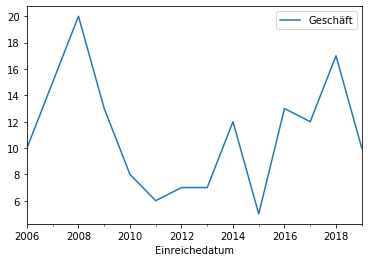

In [37]:
dfalg=df5[df5["P"].str.contains("ALG")]
dfalgz=dfalg[["Geschäft"]]
dfalgz["2006":].resample("A").count().plot()

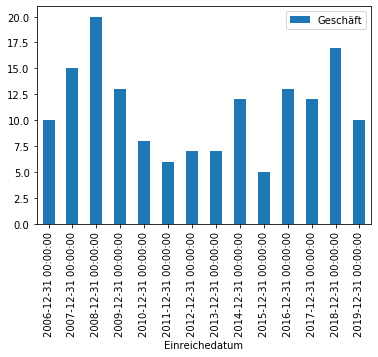

In [38]:
dfalgz["2006":].resample("A").count().plot(kind="bar")

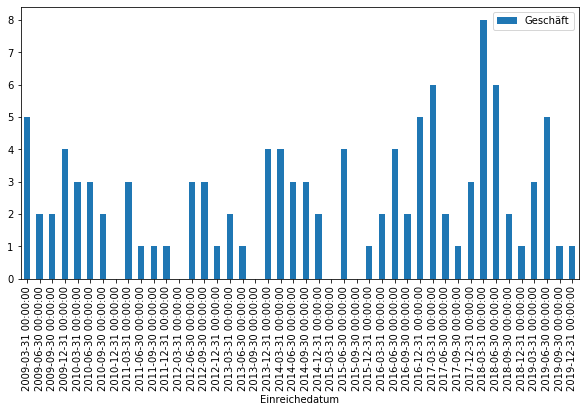

In [69]:
dfalgz["2009":].resample("Q").count().plot(kind="bar", figsize=(10,5))

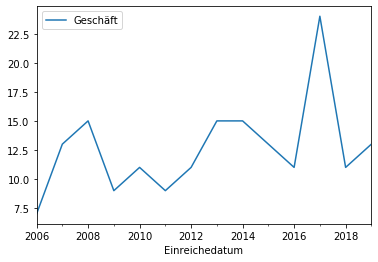

In [40]:
dfsvp=df5[df5["P"].str.contains("SVP")]
dfsvpz=dfsvp[["Geschäft"]]
dfsvpz["2006":].resample("A").count().plot()

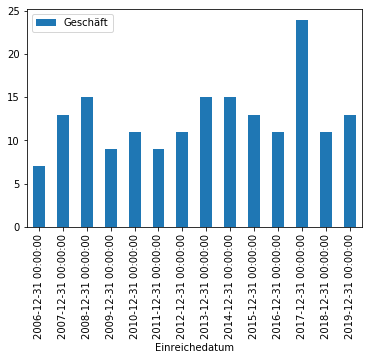

In [41]:
dfsvpz["2006":].resample("A").count().plot(kind="bar")

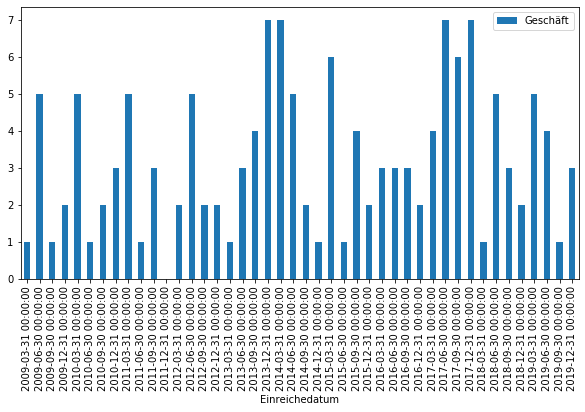

In [70]:
dfsvpz["2009":].resample("Q").count().plot(kind="bar", figsize=(10,5))

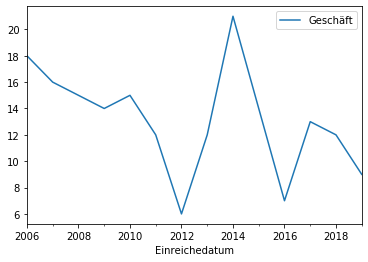

In [43]:
dfcvp=df5[df5["P"].str.contains("CVP")]
dfcvpz=dfcvp[["Geschäft"]]
dfcvpz["2006":].resample("A").count().plot()

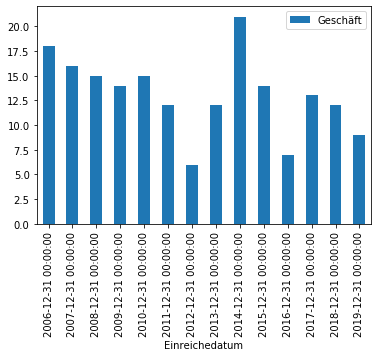

In [44]:
dfcvpz["2006":].resample("A").count().plot(kind="bar")

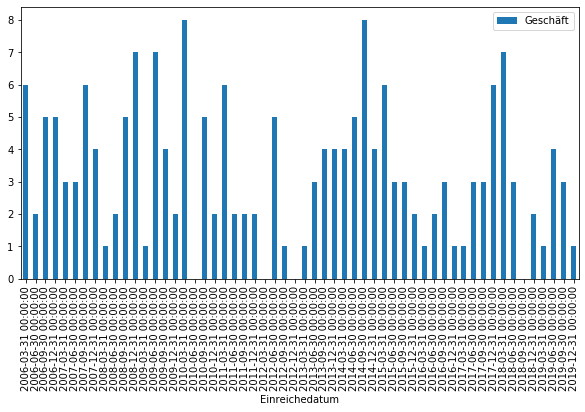

In [71]:
dfcvpz["2006":].resample("Q").count().plot(kind="bar", figsize=(10,5))

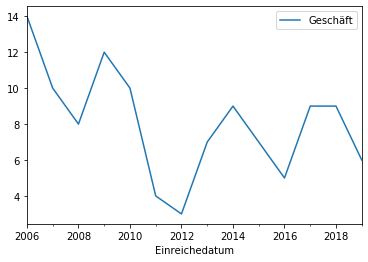

In [45]:
dffdp=df5[df5["P"].str.contains("FDP")]
dffdpz=dffdp[["Geschäft"]]
dffdpz["2006":].resample("A").count().plot()

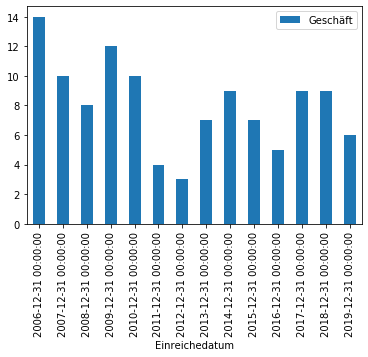

In [46]:
dffdpz["2006":].resample("A").count().plot(kind="bar")

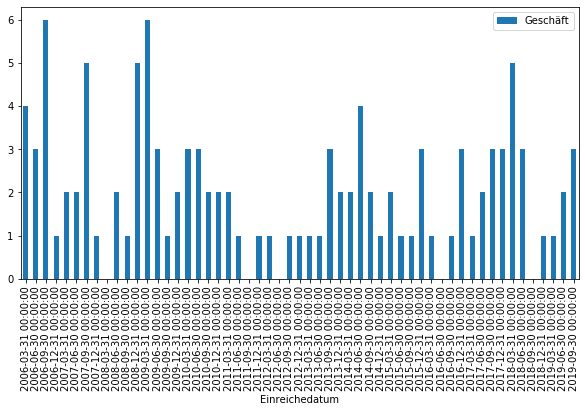

In [72]:
dffdpz["2006":].resample("Q").count().plot(kind="bar", figsize=(10,5))

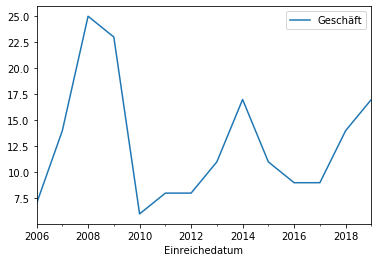

In [47]:
dfsp=df5[df5["P"].str.contains("SP")]
dfspz=dfsp[["Geschäft"]]
dfspz["2006":].resample("A").count().plot()

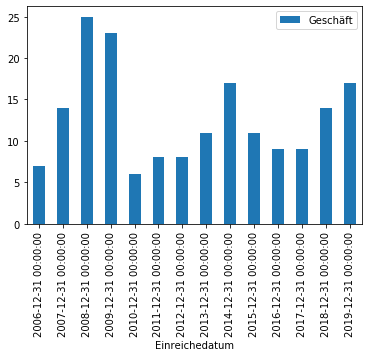

In [48]:
dfspz["2006":].resample("A").count().plot(kind="bar")

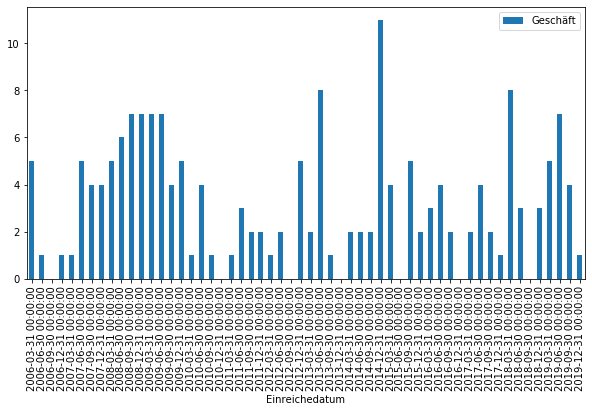

In [73]:
dfspz["2006":].resample("Q").count().plot(kind="bar", figsize=(10,5))

# Nun müsste ich diese zusammenführen
aber wie nur - geht es wenn ich die Frames einzeln abspeichere?

In [76]:
cvp=dfcvpz["2005":].resample("A").count()
fdp=dffdpz["2005":].resample("A").count()
svp=dfsvpz["2005":].resample("A").count()
sp=dfspz["2005":].resample("A").count()
alg=dfalgz["2005":].resample("A").count()

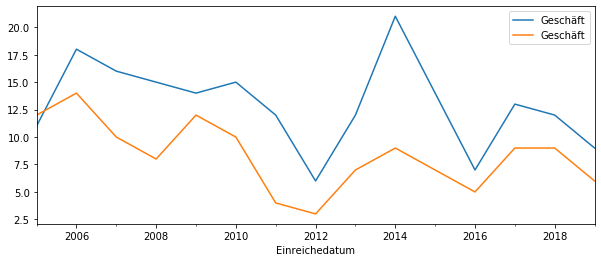

In [77]:
ax = cvp.plot()
fdp.plot(ax=ax, figsize=(10,4)) #zwei zusammen. ok vielleicht noch mit unstack

# Alle miteinander plotten
Dazu versuche ich die Parteien zu Columns zu machen und das Datum wieder als Zeile

In [51]:
# Ich versuche es mal mit en parteien einzeln
df_umgekehrt_m=df5.groupby("P").resample("M").count().unstack()
df_umgekehrt_q=df5.groupby("P").resample("Q").count().unstack()
df_umgekehrt_a=df5.groupby("P").resample("A").count().unstack()
df_umge=df_umgekehrt_a[["Unnamed: 0"]] #hier kann ich nun wähen welches DF. also wie resamplet
df_swi=df_umge.T #hier mache ich die Zeilen zu Spalten und umgekehrt.
df_swit=df_swi.reset_index(level=1)#ich muss irgendwie wieder den Datetime-Index haben
df_7=df_swit.set_index(pd.DatetimeIndex(df_swit["Einreichedatum"]))
df8=df_7.sort_index()

In [52]:
del df8 ["Einreichedatum"]
del df8 ["CSP"]
del df8 ["SGA"]
del df8 ["pl"]
del df8 ["GLP"]

In [53]:
del df8 ["Piraten"]

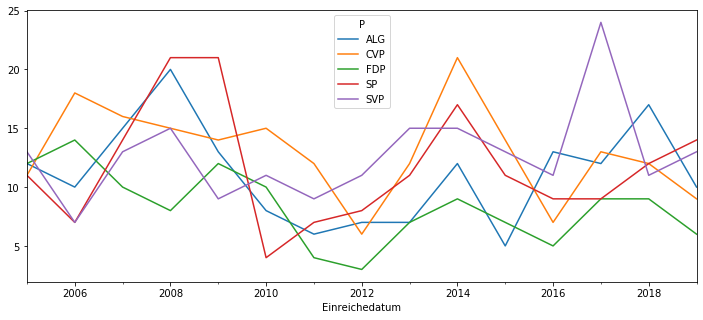

In [54]:
df8["2005":].plot(figsize=(12,5))

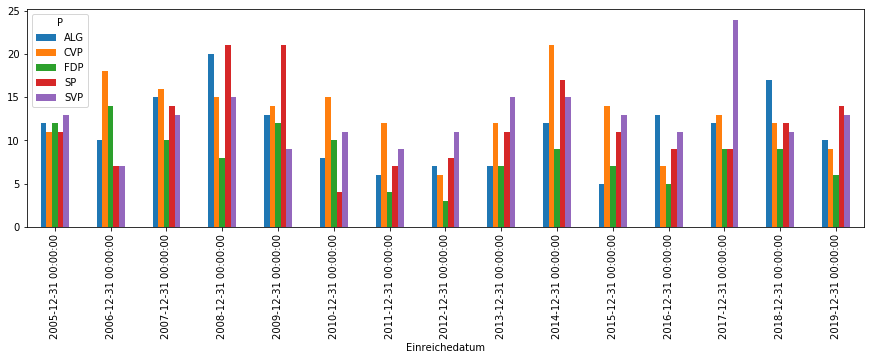

In [55]:
df8["2005":].plot(figsize=(15,4), kind="bar")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000220A8F6AAC8>,
      dtype=object)

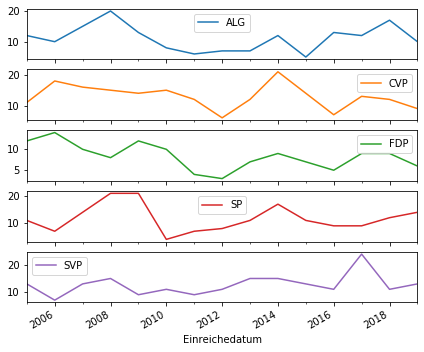

In [57]:
df8["2005":].plot(subplots=True, figsize=(7,6))

# Parteien in den Quartale vor Wahlen

In [58]:
df1_umgekehrt_m=df5.groupby("P").resample("M").count().unstack()
df1_umgekehrt_q=df5.groupby("P").resample("Q").count().unstack()
df1_umgekehrt_a=df5.groupby("P").resample("A").count().unstack()
df1_umge=df1_umgekehrt_q[["Unnamed: 0"]]
df1_swi=df1_umge.T #hier mache ich die Zeilen zu Spalten und umgekehrt.

In [59]:
df1_swit=df1_swi.reset_index(level=1)#ich muss irgendwie wieder den Datetime-Index haben
df_71=df1_swit.set_index(pd.DatetimeIndex(df1_swit["Einreichedatum"]))
df81=df_71.sort_index()

In [60]:
del df81 ["Einreichedatum"]
del df81 ["CSP"]
del df81 ["SGA"]
del df81 ["pl"]

del df81 ["Piraten"]

In [61]:
df81

P,ALG,CVP,FDP,GLP,SP,SVP
Einreichedatum,,,,,,
1982-12-31,NaN,1.0,1.0,NaN,NaN,1.0
1983-03-31,NaN,0.0,0.0,NaN,NaN,0.0
1983-06-30,NaN,0.0,0.0,NaN,NaN,0.0
1983-09-30,NaN,0.0,0.0,NaN,NaN,0.0
1983-12-31,NaN,0.0,0.0,NaN,NaN,0.0
...,...,...,...,...,...,...
2018-12-31,1.0,2.0,1.0,0.0,3.0,2.0
2019-03-31,3.0,1.0,1.0,2.0,2.0,5.0
2019-06-30,5.0,4.0,2.0,1.0,7.0,4.0


In [62]:
del df81 ["GLP"]

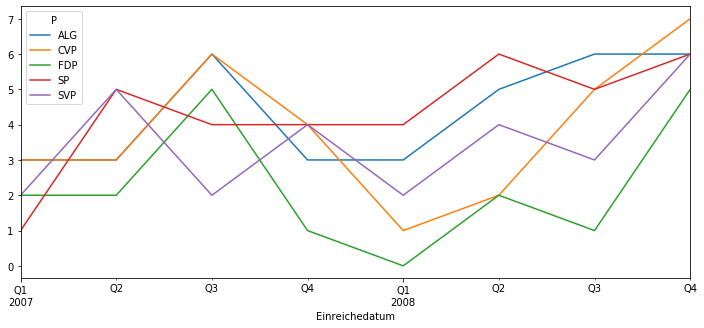

In [64]:
df81["2007":"2008"].plot(figsize=(12,5))

In [65]:
# Ich versuche es mal mit en parteien einzeln
df2_umgekehrt_m=df5.groupby("Stand").resample("M").count().unstack()
df2_umgekehrt_q=df5.groupby("Stand").resample("Q").count().unstack()
df2_umgekehrt_a=df5.groupby("Stand").resample("A").count().unstack()
df2_umge=df2_umgekehrt_q[["Unnamed: 0"]] #hier kann ich nun wähen welches DF. also wie resamplet
df2_swi=df2_umge.T #hier mache ich die Zeilen zu Spalten und umgekehrt.
df2_swit=df2_swi.reset_index(level=1)#ich muss irgendwie wieder den Datetime-Index haben
df2_7=df2_swit.set_index(pd.DatetimeIndex(df2_swit["Einreichedatum"]))
df28=df2_7.sort_index()
del df28 ["Einreichedatum"]
del df28 ["Einreichung"]
del df28 ["Erledigterklärung"]
del df28 ["Datenmigration"]
del df28 ["Erheblicherklärung"]
del df28 ["Überweisung an Regierungsrat"]

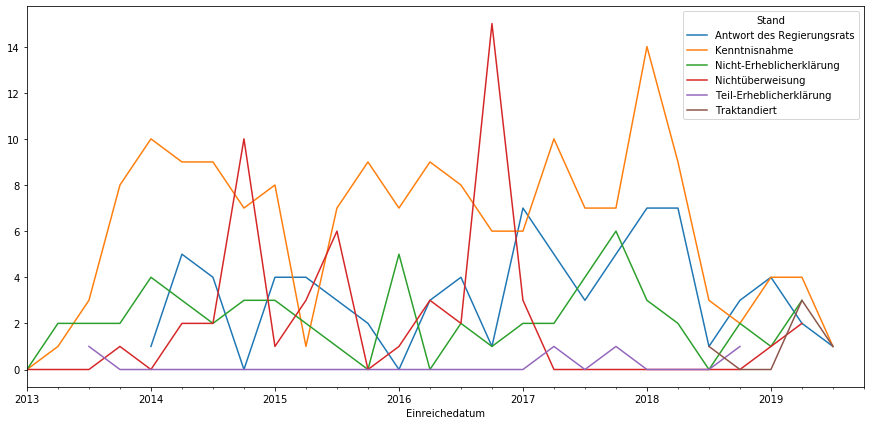

In [67]:
df28["2013":"2019"].plot(figsize=(15,7)) #So sieht es betreffend Status aus

In [14]:
df5[df5["Stand"].str.contains("Nichtüberweisung")]

ValueError: cannot index with vector containing NA / NaN values